<h1><center>Entrega 2</h1>

# Librerias

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import hdbscan

import warnings
warnings.filterwarnings("ignore")

# Cargar archivos

In [50]:
mbr = pd.read_csv('archivos_limpios/mbr.csv')

`mbr`contiene **registros individuales de evaluaciones hechas por usuarios a diferentes aplicaciones**

* **app_package**: Identificador del paquete de la aplicacion (nombre del archivo de la app en Play Store).
* **review**: La reseña del usuario
* **rating**: Calificación otorgada por el usuario a la aplicacion escala de 1 a 5 estrellas.
* **votes**: Número de votos o interacciones que ha recibido esa evaluacion
* **uid**: Identificador unico del usuario que emitió la evaluación.
* **formated_date**: Fecha en que se realizó la evaluación, en formato de texto.
* **app_category**: Categoría a la que pertenece la aplicacion (*Social*, *Productivity*, *Games*).


### Las categorias son

In [51]:
print("Categorías únicas de apps:")
print(mbr['app_category'].unique())

Categorías únicas de apps:
['Casual' 'Health & Fitness' 'Word' 'Entertainment' 'Dating' 'Shopping'
 'Education' 'Business' 'Libraries & Demo' 'Weather' 'Puzzle'
 'Personalization' 'Simulation' 'Maps & Navigation' 'Action'
 'Role Playing' 'Productivity' 'Sports' 'Communication' 'Tools' 'Beauty'
 'Educational' 'Photography' 'Board' 'Music & Audio' 'Finance'
 'Books & Reference' 'Lifestyle' 'Strategy' 'Racing' 'Trivia' 'Parenting'
 'Arcade' 'Adventure' 'Travel & Local' 'Card' 'Casino'
 'Video Players & Editors' 'Food & Drink' 'Medical' 'Comics'
 'News & Magazines' 'Music' 'Social' 'Events' 'Art & Design'
 'House & Home' 'Auto & Vehicles']


### Acortar categorias

In [52]:
# Diccionario para agrupar categorías


# Play Store categories to a more general category
category_mapping = {
    'ART_AND_DESIGN': 'Art',
    'AUTO_AND_VEHICLES': 'Auto',
    'BEAUTY': 'Lifestyle',
    'BOOKS_AND_REFERENCE': 'Books',
    'BUSINESS': 'Business',
    'COMICS': 'Entertainment',
    'COMMUNICATION': 'Communication',
    'DATING': 'Social',
    'EDUCATION': 'Education',
    'ENTERTAINMENT': 'Entertainment',
    'EVENTS': 'Lifestyle',
    'FINANCE': 'Finance',
    'FOOD_AND_DRINK': 'Food',
    'HEALTH_AND_FITNESS': 'Health',
    'HOUSE_AND_HOME': 'Lifestyle',
    'LIBRARIES_AND_DEMO': 'Tools',
    'LIFESTYLE': 'Lifestyle',
    'GAME': 'Games',
    'FAMILY': 'Games',
    'MEDICAL': 'Health',
    'SOCIAL': 'Social',
    'SHOPPING': 'Shopping',
    'PHOTOGRAPHY': 'Photography',
    'SPORTS': 'Sports',
    'TRAVEL_AND_LOCAL': 'Travel',
    'TOOLS': 'Tools',
    'PERSONALIZATION': 'Tools',
    'PRODUCTIVITY': 'Productivity',
    'PARENTING': 'Family',
    'WEATHER': 'Weather',
    'VIDEO_PLAYERS': 'Entertainment',
    'NEWS_AND_MAGAZINES': 'News',
    'MAPS_AND_NAVIGATION': 'Travel',
}

# mbr categories to a more general category
mbr_to_play_mapping = {
    'Casual': 'Games',
    'Health & Fitness': 'Health',
    'Word': 'Games',
    'Entertainment': 'Entertainment',
    'Dating': 'Social',
    'Shopping': 'Shopping',
    'Education': 'Education',
    'Business': 'Business',
    'Libraries & Demo': 'Tools',
    'Weather': 'Weather',
    'Puzzle': 'Games',
    'Personalization': 'Tools',
    'Simulation': 'Games',
    'Maps & Navigation': 'Travel',
    'Action': 'Games',
    'Role Playing': 'Games',
    'Productivity': 'Productivity',
    'Sports': 'Sports',
    'Communication': 'Communication',
    'Tools': 'Tools',
    'Beauty': 'Lifestyle',
    'Educational': 'Education',
    'Photography': 'Photography',
    'Board': 'Games',
    'Music & Audio': 'Entertainment',
    'Finance': 'Finance',
    'Books & Reference': 'Books',
    'Lifestyle': 'Lifestyle',
    'Strategy': 'Games',
    'Racing': 'Games',
    'Trivia': 'Games',
    'Parenting': 'Family',
    'Arcade': 'Games',
    'Adventure': 'Games',
    'Travel & Local': 'Travel',
    'Card': 'Games',
    'Casino': 'Games',
    'Video Players & Editors': 'Entertainment',
    'Food & Drink': 'Food',
    'Medical': 'Health',
    'Comics': 'Entertainment',
    'News & Magazines': 'News',
    'Music': 'Entertainment',
    'Social': 'Social',
    'Events': 'Lifestyle',
    'Art & Design': 'Art',
    'House & Home': 'Lifestyle',
    'Auto & Vehicles': 'Auto'
}




In [53]:
mbr['Category_Reduced'] = mbr['app_category'].map(mbr_to_play_mapping).fillna('Other')
print(mbr["Category_Reduced"].unique())
mbr.head()


['Games' 'Health' 'Entertainment' 'Social' 'Shopping' 'Education'
 'Business' 'Tools' 'Weather' 'Travel' 'Productivity' 'Sports'
 'Communication' 'Lifestyle' 'Photography' 'Finance' 'Books' 'Family'
 'Food' 'News' 'Art' 'Auto']


,app_package,review,rating,votes,uid,formated_date,app_category,Category_Reduced
0,com.cleverapps.heroes,It's really a fun game,5,1,shqoc6X1fcJRLEmx,2018-10-21,Casual,Games
1,com.bodyfast,uninstalling. it was ok but felt like it was c...,2,0,shqoc6X1fcJRLEmx,2019-01-18,Health & Fitness,Health
2,com.thrivegames.wordshapes,Love this game,4,1,shqoc6X1fcJRLEmx,2021-01-16,Word,Games
3,com.affinity.rewarded_play,Doesn't update play time. Just downloaded it 3...,1,1,shqoc6X1fcJRLEmx,2021-11-04,Entertainment,Entertainment
4,dating.inmessage.net,app crashes every time I try to log in. what g...,1,0,shqoc6X1fcJRLEmx,2021-11-24,Dating,Social


In [54]:
print(mbr["app_package"].nunique())

7138


In [55]:
mbr.columns

Index(['app_package', 'review', 'rating', 'votes', 'uid', 'formated_date',
       'app_category', 'Category_Reduced'],
      dtype='object')

In [56]:
google = pd.read_csv('archivos_limpios/df_merge_store.csv')
print(google['Category_Reduced'].unique())
google.head()

['Art' 'Auto' 'Lifestyle' 'Books' 'Business' 'Entertainment'
 'Communication' 'Social' 'Education' 'Finance' 'Food' 'Health' 'Tools'
 'Games' 'Shopping' 'Photography' 'Sports' 'Travel' 'Productivity'
 'Family' 'Weather' 'News']


,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category_Reduced
0,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,0,0.0,0,Art & Design;Pretend Play,A kid's excessive ads. The types ads allowed a...,-1,-0.250,1.000000,Art
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,0,0.0,0,Art & Design;Pretend Play,It bad >:(,-1,-0.725,0.833333,Art
2,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,0,0.0,0,Art & Design;Pretend Play,like,0,0.000,0.000000,Art
3,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,0,0.0,0,Art & Design;Pretend Play,I love colors inspyering,1,0.500,0.600000,Art
4,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,0,0.0,0,Art & Design;Pretend Play,I hate,-1,-0.800,0.900000,Art


# Pregunta 4:  ¿Influye el rating de las aplicaciones con las descargas de estas? Porque esto ayuda al entendimiento de la confianza digital y las decisiones de descargas de los usuarios.


### MBR 

In [57]:
agg = mbr.groupby('app_package').agg(
  mbr_installs=('uid', 'count'),
  mbr_rating_mean=('rating', 'mean'),
  Category_Reduced=('Category_Reduced', 'first')
).reset_index()
agg.sort_values(by='mbr_rating_mean', ascending=False, inplace=True)

In [58]:
agg.head(10)

,app_package,mbr_installs,mbr_rating_mean,Category_Reduced
3290,com.kofflancanta.icescream,1,5.0,Tools
3704,com.midva.games.free.hiddenObjects.vampireLove,1,5.0,Games
2771,com.hexoline.fwfgold,1,5.0,Tools
2750,com.herinteractive.codesandclues,2,5.0,Education
443,com.StudioPango.StoryTime,2,5.0,Education
6912,pkeyboard.languagepack.es,1,5.0,Tools
6317,dk.mymovies.mymovies3forandroidfree,2,5.0,Tools
6913,pl.ayground.coloringbook.plus,1,5.0,Entertainment
2733,com.heb.centralmarket,1,5.0,Shopping
2731,com.healthcoolsunapps.bodytemperature,1,5.0,Health


#### Analisis 

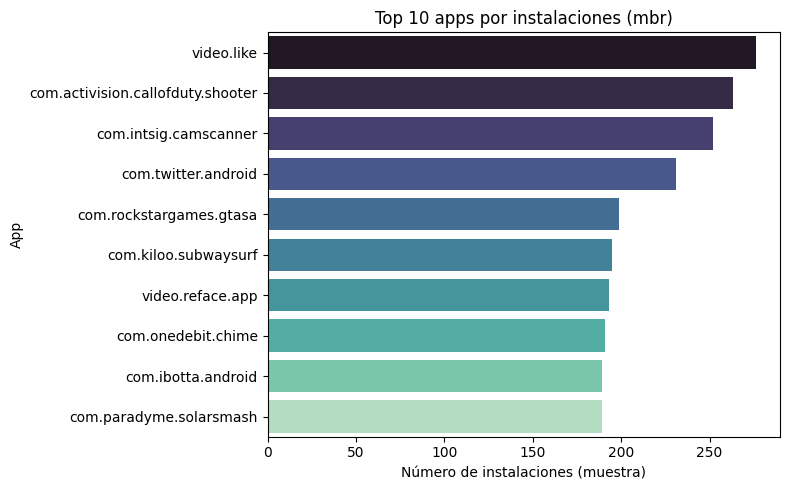

,app_package,mbr_installs,mbr_rating_mean,Category_Reduced
7099,video.like,276,3.014493,Social
529,com.activision.callofduty.shooter,263,3.022814,Games
3054,com.intsig.camscanner,252,3.230159,Productivity
5753,com.twitter.android,231,3.004329,Social
4803,com.rockstargames.gtasa,199,2.804020,Games
3245,com.kiloo.subwaysurf,195,2.928205,Games
7102,video.reface.app,193,3.150259,Entertainment
4177,com.onedebit.chime,191,3.178010,Finance
2914,com.ibotta.android,189,3.042328,Shopping
4272,com.paradyme.solarsmash,189,3.333333,Games


In [ ]:
# Ordena y toma las 10 más instaladas
top10 = agg.sort_values('mbr_installs', ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(
    data=top10,
    x='mbr_installs',
    y='app_package',
    palette='mako'
)
plt.title('Top 10 apps por instalaciones (mbr)')
plt.xlabel('Número de instalaciones (muestra)')
plt.ylabel('App')
plt.tight_layout()
plt.show()

top10

Se puede ver como las apps mas intaladas no tienen rating muy altos, todods van entre 2-3

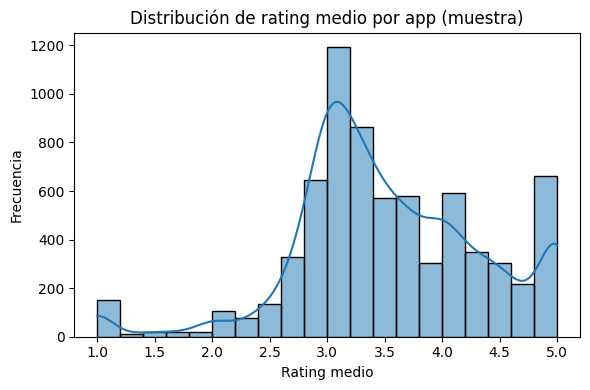

In [60]:
plt.figure(figsize=(6,4))
sns.histplot(agg['mbr_rating_mean'], bins=20, kde=True)
plt.title('Distribución de rating medio por app (muestra)')
plt.xlabel('Rating medio')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


Las puntuaciones de las apps estan centradas en 3pto 

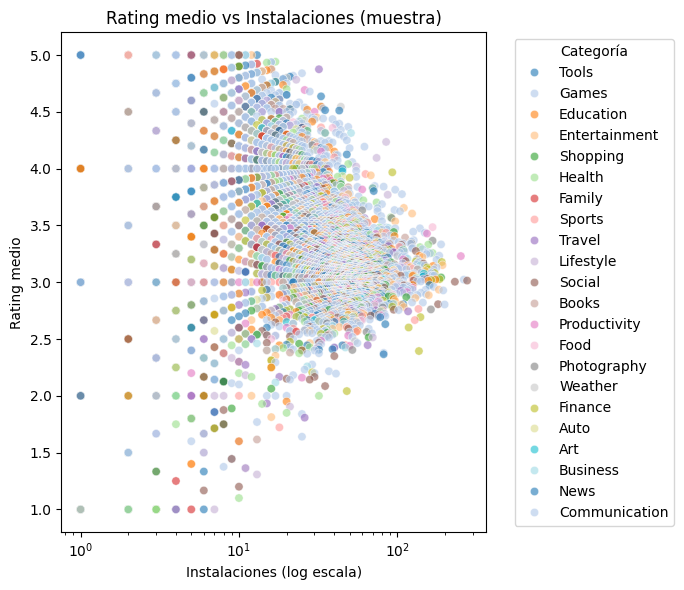

In [ ]:
plt.figure(figsize=(7,6))
sns.scatterplot(
    data=agg,
    x='mbr_installs',
    y='mbr_rating_mean',
    hue='Category_Reduced',
    alpha=0.6,
    palette='tab20'
)
plt.xscale('log')
plt.title('Rating medio vs Instalaciones (muestra)')
plt.xlabel('Instalaciones (log escala)')
plt.ylabel('Rating medio')
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Los puntos mas a la izquierda son apps que casi no aparecen en la muestra, es decir, aquellas que sólo uno o dos usuarios han instalado (mbr_installs muy bajo). Podemos ver apps con ratings muy altos y pocas instal 

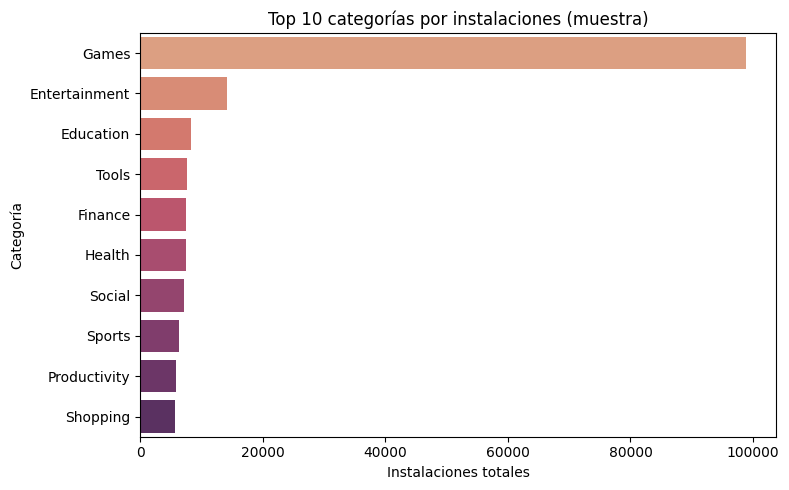

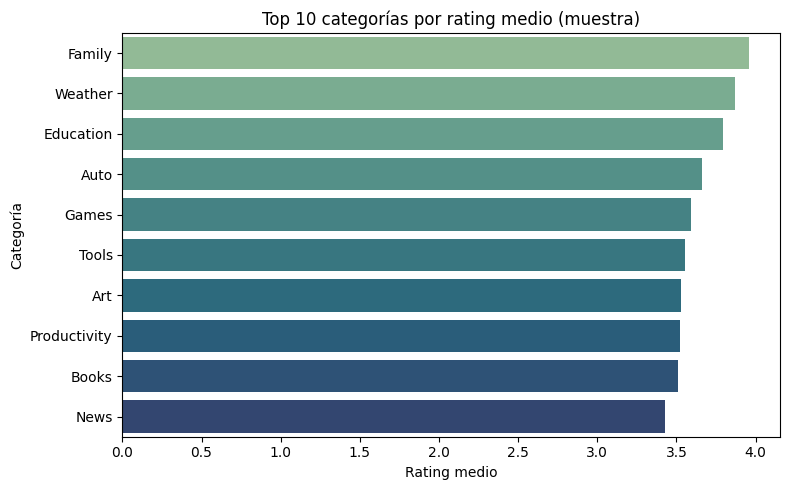

In [ ]:
# Agrupa por categoría
cat_stats = agg.groupby('Category_Reduced').agg(
    installs_sum=('mbr_installs','sum'),
    rating_mean=('mbr_rating_mean','mean'),
    app_count=('app_package','size')
).sort_values('installs_sum', ascending=False)


plt.figure(figsize=(8,5))
sns.barplot(
    data=cat_stats.head(10).reset_index(),
    x='installs_sum',
    y='Category_Reduced',
    palette='flare'
)
plt.title('Top 10 categorías por instalaciones (muestra)')
plt.xlabel('Instalaciones totales')
plt.ylabel('Categoría')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(
    data=cat_stats.sort_values('rating_mean', ascending=False).head(10).reset_index(),
    x='rating_mean',
    y='Category_Reduced',
    palette='crest'
)
plt.title('Top 10 categorías por rating medio (muestra)')
plt.xlabel('Rating medio')
plt.ylabel('Categoría')
plt.tight_layout()
plt.show()


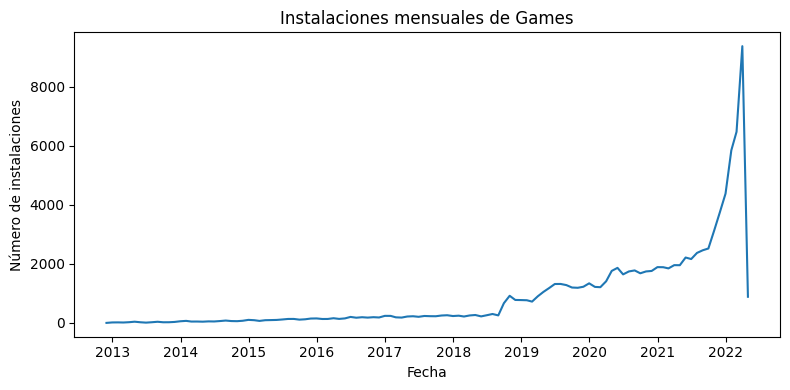

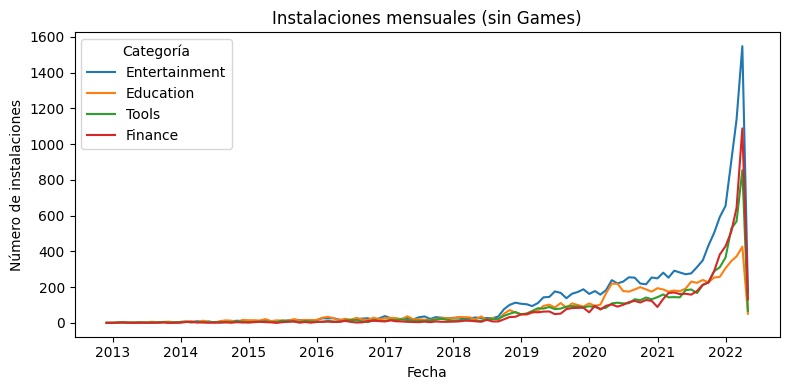

In [63]:
mbr['formated_date'] = pd.to_datetime(mbr['formated_date'])

ts_cat = (
    mbr
    .groupby([pd.Grouper(key='formated_date', freq='M'),
              'Category_Reduced'])
    .size()                       
    .unstack(fill_value=0)      
)


top5 = ts_cat.sum().sort_values(ascending=False).head(5).index
ts_plot = ts_cat[top5]


plt.figure(figsize=(8,4))
plt.plot(ts_plot.index, ts_plot['Games'], color='C0')
plt.title('Instalaciones mensuales de Games')
plt.xlabel('Fecha')
plt.ylabel('Número de instalaciones')
plt.tight_layout()
plt.show()

others = [c for c in ts_plot.columns if c != 'Games']
plt.figure(figsize=(8,4))
for cat in others:
    plt.plot(ts_plot.index, ts_plot[cat], label=cat)
plt.title('Instalaciones mensuales (sin Games)')
plt.xlabel('Fecha')
plt.ylabel('Número de instalaciones')
plt.legend(title='Categoría', loc='upper left')
plt.tight_layout()
plt.show()


#### GMM

In [ ]:
X = agg[['mbr_installs', 'mbr_rating_mean']].copy()
X['log_installs'] = np.log1p(X['mbr_installs'])
features = X[['log_installs', 'mbr_rating_mean']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Probar distintos números de componentes
scores = []
models = {}
for k in range(2, 8): 
    gmm = GaussianMixture(n_components=k, random_state=0)
    labels = gmm.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    scores.append((k, sil))
    models[k] = (gmm, labels)


scores_df = pd.DataFrame(scores, columns=['n_components', 'silhouette'])
print(scores_df)

# Seleccionar el k con mejor silhouette
best_k, best_score = max(scores, key=lambda x: x[1])
print(f"\nMejor k: {best_k} con Silhouette = {best_score:.3f}")

   n_components  silhouette
0             2    0.386742
1             3    0.462051
2             4    0.430563
3             5    0.369590
4             6    0.373951
5             7    0.377332

Mejor k: 3 con Silhouette = 0.462


In [65]:
from sklearn import mixture

gmm = mixture.GaussianMixture(n_components=3, covariance_type="full")
gmm.fit(X)


GaussianMixture(n_components=3)

AIC para ver que componentes nos combienen mas

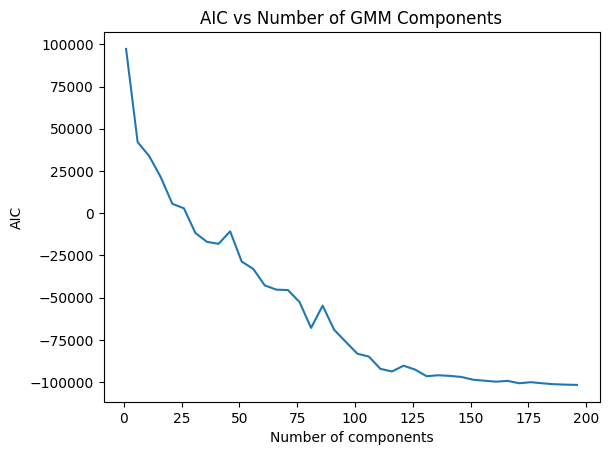

In [ ]:
n_components = np.arange(1, 200, 5) 
models = [mixture.GaussianMixture(n, covariance_type='full') for n in n_components]
aics = [model.fit(X).aic(X) for model in models]
plt.plot(n_components, aics)
plt.xlabel('Number of components')
plt.ylabel('AIC')
plt.title('AIC vs Number of GMM Components')
plt.show()

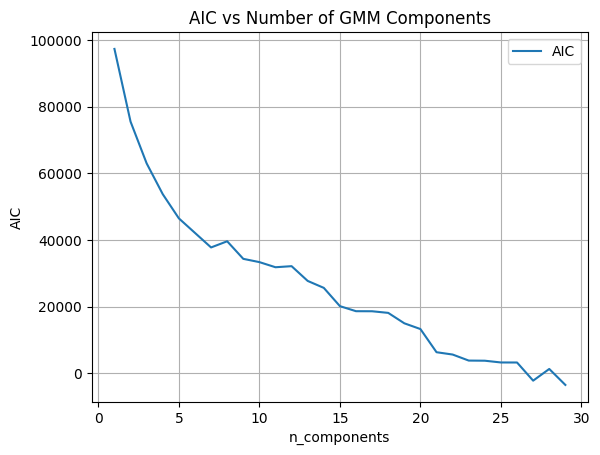

In [67]:
n_components = np.arange(1, 30)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in n_components]

plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.xlabel('n_components');
plt.ylabel('AIC')
plt.title('AIC vs Number of GMM Components')
plt.legend()
plt.grid()
plt.show()


In [68]:
aics = np.asarray([m.aic(X) for m in models])
np.where(aics == np.amin(aics))[0][0]

np.int64(28)

   n_components  silhouette
0             3    0.462051
1            27    0.270363

Mejor k: 3 con Silhouette = 0.462


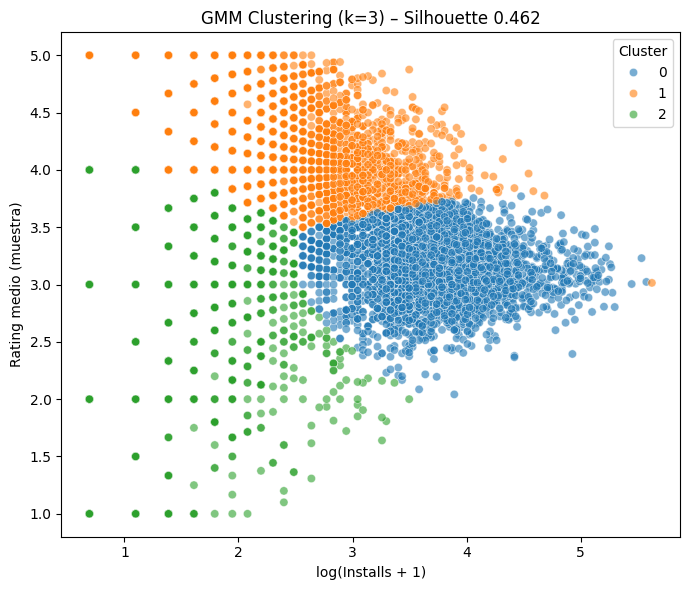

In [ ]:


X = agg[['mbr_installs', 'mbr_rating_mean']].copy()
X['log_installs'] = np.log1p(X['mbr_installs'])
features = X[['log_installs', 'mbr_rating_mean']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Probar distintos números de componentes que incluyan los de AIC
scores = []
models = {}
for k in [3, 27]:  # por ejemplo, de 2 a 7 clusters
    gmm = GaussianMixture(n_components=k, random_state=0)
    labels = gmm.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    scores.append((k, sil))
    models[k] = (gmm, labels)

scores_df = pd.DataFrame(scores, columns=['n_components', 'silhouette'])
print(scores_df)

best_k, best_score = max(scores, key=lambda x: x[1])
print(f"\nMejor k: {best_k} con Silhouette = {best_score:.3f}")

best_gmm, best_labels = models[best_k]
agg['gmm_cluster'] = best_labels
agg['log_installs'] = X['log_installs']

plt.figure(figsize=(7,6))
palette = sns.color_palette('tab10', best_k)
sns.scatterplot(
    x='log_installs',
    y='mbr_rating_mean',
    hue='gmm_cluster',
    data=agg,
    palette=palette,
    alpha=0.6,
    legend='full'
)
plt.title(f'GMM Clustering (k={best_k}) – Silhouette {best_score:.3f}')
plt.xlabel('log(Installs + 1)')
plt.ylabel('Rating medio (muestra)')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


Aunque el AIC alcanzó su valor mínimo en k ≈ 28, decidimos quedarnos con k = 3 porque fue el que obtuvo el mejor Silhouette score

AIC nos dice hasta dónde llega el ajuste generativo, pero no evalúa la cohesión interna ni la separación de clusters.

Silhouette sí mide calidad de partición y es la métrica más adecuada para elegir el número de clusters que queremos interpretar y explotar en nuestro análisis de apps.

Por eso, aunque el AIC “prefiera” 28, optamos por k = 3, equilibrando buen ajuste y utilidad práctica.

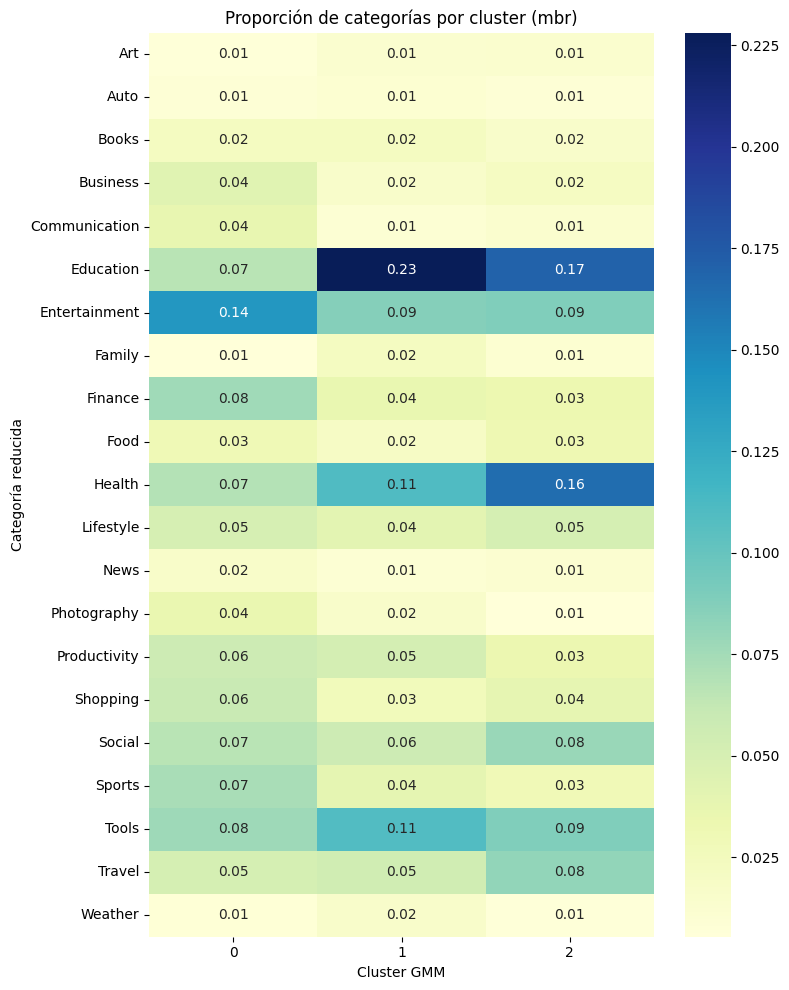

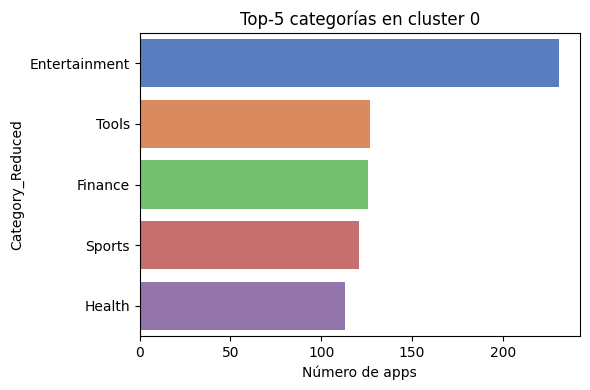

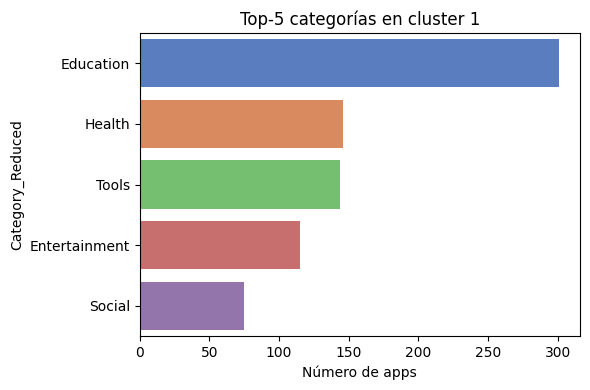

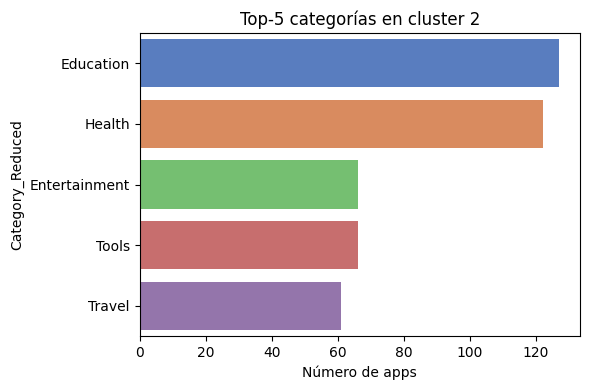

In [ ]:
counts = (agg.groupby(['gmm_cluster','Category_Reduced'])
            .size()
            .reset_index(name='n_apps'))

#quitar Games  
counts = counts[counts['Category_Reduced'] != 'Games']

pivot = counts.pivot(index='Category_Reduced', columns='gmm_cluster', values='n_apps').fillna(0)

prop = pivot.divide(pivot.sum(axis=0), axis=1)

plt.figure(figsize=(8,10))
sns.heatmap(prop, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Proporción de categorías por cluster (mbr)')
plt.xlabel('Cluster GMM')
plt.ylabel('Categoría reducida')
plt.tight_layout()
plt.show()

for c in pivot.columns:
    top5 = pivot[c].sort_values(ascending=False).head(5)
    plt.figure(figsize=(6,4))
    sns.barplot(x=top5.values, y=top5.index, palette='muted')
    plt.title(f'Top-5 categorías en cluster {c}')
    plt.xlabel('Número de apps')
    plt.tight_layout()
    plt.show()

In [71]:
corr = agg['mbr_rating_mean'].corr(agg['log_installs'])
print(f"Correlación Rating vs log(Installs): {corr:.2f}")


Correlación Rating vs log(Installs): -0.30


Al analizar todos los dominios, la categoría “Games” concentró entre un 32 % y un 52 % de las apps en cada cluster, lo que enmascaraba el comportamiento de las demás. Al retirarla, los tres clusters muestran patrones más clarificadores:

Cluster 0 (apps con muchas instalaciones y rating medio): aquí predominan principalmente “Entertainment”, seguido de “Tools”, “Productivity”, “Sports”, “Social” y “Finance” (cada una rondando un 2–7 % del total).

Cluster 1 (instalaciones intermedias y rating alto): destaca “Education” con alrededor de 11 %, luego “Health” con un 5 %, y a continuación “Tools”, “Travel” y “Social” con proporciones que van del 3 al 5 %.

Cluster 2 (pocas instalaciones y rating bajo): vuelve a aparecer “Education” (≈ 12 %) y “Health” (≈ 11 %), junto con “Tools”, “Travel” y “Social” (entre 3 % y 6 %).

Conclusión sobre la influencia del rating en las descargas
El rating sí impacta las descargas, pero solo en ciertos dominios. En “Education” y “Health”, un rating alto se asocia claramente con un mayor volumen de instalaciones (aparecen en el cluster de rating alto). En cambio, en categorías de gran alcance como “Games” o “Entertainment”, el volumen de descargas depende más de otros factores (marketing, tendencias, visibilidad) que del propio rating.

¿Influye el rating en las descargas?
Sí, pero solo en ciertos dominios:

En Education y Health, un rating alto aumenta significativamente las descargas (pesan mucho en el cluster de rating alto).

En categorías masivas como Games o Entertainment, el volumen de instalaciones queda casi independiente del rating: otras variables (marketing, visibilidad, tendencia) son las que realmente mueven las descargas.

#### HDBSCAN

In [ ]:
mbr = pd.read_csv('archivos_limpios/mbr.csv')
mbr['Category_Reduced'] = mbr['app_category'].map(mbr_to_play_mapping).fillna('Other')
print(mbr["Category_Reduced"].unique())
mbr.head()

#Repito para aseurar que estoy trabajando con los datos correctos
agg = mbr.groupby('app_package').agg(
  mbr_installs=('uid', 'count'),
  mbr_rating_mean=('rating', 'mean'),
  Category_Reduced=('Category_Reduced', 'first')
).reset_index()
agg.head()

['Games' 'Health' 'Entertainment' 'Social' 'Shopping' 'Education'
 'Business' 'Tools' 'Weather' 'Travel' 'Productivity' 'Sports'
 'Communication' 'Lifestyle' 'Photography' 'Finance' 'Books' 'Family'
 'Food' 'News' 'Art' 'Auto']


,app_package,mbr_installs,mbr_rating_mean,Category_Reduced
0,OCTech.Mobile.Applications.TouchScan,7,2.285714,Communication
1,abdelrahman.wifianalyzerpremium,4,2.750000,Tools
2,ae.gov.iacad.PrayerTimings,7,3.571429,Education
3,ae.gov.mol,28,3.500000,Business
4,ai.abridge.nativeclient.release,3,3.000000,Health


In [73]:
df = agg.copy()
# log1p de instalaciones para suavizar la asimetría
df['log_installs'] = np.log1p(df['mbr_installs'])
X = df[['log_installs', 'mbr_rating_mean']].values

# 2) Estandarizamos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
param_grid = [
    {'min_cluster_size': 20, 'min_samples': 5},
    {'min_cluster_size': 20, 'min_samples': 10},
    {'min_cluster_size': 20, 'min_samples': 15},
    {'min_cluster_size': 20, 'min_samples': 20},
    {'min_cluster_size': 20, 'min_samples': 30},
    {'min_cluster_size': 20, 'min_samples': 40},

]

results = []
for params in param_grid:
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=params['min_cluster_size'],
        min_samples=params['min_samples'],
        cluster_selection_method='eom',
        prediction_data=True
    )
    labels = clusterer.fit_predict(X_scaled)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    noise_pct = np.mean(labels == -1)
    results.append({
        'params': params,
        'n_clusters': n_clusters,
        'noise_pct': noise_pct,
        'labels': labels
    })

# Elegimos el que tenga más clusters útiles y menos ruido
results_df = pd.DataFrame([
    {'params': r['params'], 'n_clusters': r['n_clusters'], 'noise_pct': r['noise_pct']}
    for r in results
])
print(results_df)

best_idx = results_df.sort_values(['n_clusters', 'noise_pct'], ascending=[False, True]).index[0]
labels = results[best_idx]['labels']
print(f"Mejor parámetro: {results[best_idx]['params']}")

                                        params  n_clusters  noise_pct
0   {'min_cluster_size': 20, 'min_samples': 5}          30   0.137854
1  {'min_cluster_size': 20, 'min_samples': 10}          34   0.110255
2  {'min_cluster_size': 20, 'min_samples': 15}          36   0.111516
3  {'min_cluster_size': 20, 'min_samples': 20}          38   0.267442
4  {'min_cluster_size': 20, 'min_samples': 30}          20   0.146960
5  {'min_cluster_size': 20, 'min_samples': 40}          19   0.182544
Mejor parámetro: {'min_cluster_size': 20, 'min_samples': 20}


         n_apps  mean_installs  mean_rating
cluster                                    
 37        3574      38.380806     3.346309
-1         1909      29.749083     3.451820
 5          286       1.000000     5.000000
 8          121       2.000000     5.000000
 0          101       1.000000     1.000000
 10          69       2.000000     3.000000
 36          66      11.863636     4.552383
 17          62       3.000000     5.000000
 34          47       9.638298     4.105443
 6           47       2.000000     4.500000
 2           47       1.000000     4.000000
 1           46       2.586957     1.005435
 18          42       4.619048     3.000000
 3           41       1.268293     2.000000
 22          40       4.000000     4.000000
 9           38       2.000000     4.000000
 12          35       3.000000     3.666667
 29          35       7.200000     3.857993
 31          34       8.147059     4.750140
 35          33      10.151515     3.801194
 21          33       4.000000  

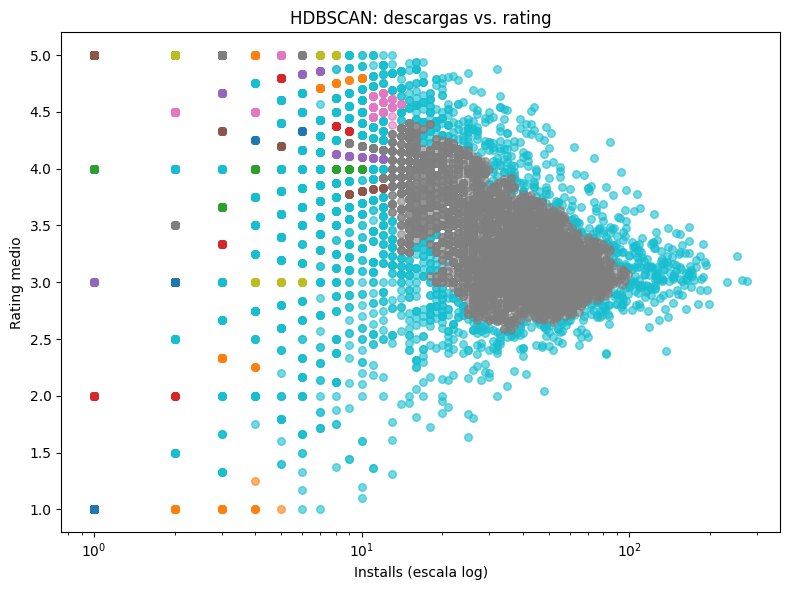

In [ ]:

df['cluster'] = labels

# Resumen por cluster
summary = df.groupby('cluster').agg(
    n_apps        = ('app_package','count'),
    mean_installs = ('mbr_installs','mean'),
    mean_rating   = ('mbr_rating_mean','mean')
).sort_values('n_apps', ascending=False)
print(summary)

plt.figure(figsize=(8,6))
palette = plt.get_cmap('tab10')
for c in np.unique(labels):
    mask = labels == c
    plt.scatter(
        df.loc[mask, 'mbr_installs'],
        df.loc[mask, 'mbr_rating_mean'],
        s=30, alpha=0.6,
        label=f'Cluster {c}',
        color=palette(c % 10)
    )
plt.xscale('log')
plt.xlabel('Installs (escala log)')
plt.ylabel('Rating medio')
plt.title('HDBSCAN: descargas vs. rating')
plt.tight_layout()
plt.show()

### Google

#### Analisis

In [76]:
google = pd.read_csv('archivos_limpios/df_merge_store.csv')
print(google['Category_Reduced'].unique())
google.head()

['Art' 'Auto' 'Lifestyle' 'Books' 'Business' 'Entertainment'
 'Communication' 'Social' 'Education' 'Finance' 'Food' 'Health' 'Tools'
 'Games' 'Shopping' 'Photography' 'Sports' 'Travel' 'Productivity'
 'Family' 'Weather' 'News']


,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category_Reduced
0,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,0,0.0,0,Art & Design;Pretend Play,A kid's excessive ads. The types ads allowed a...,-1,-0.250,1.000000,Art
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,0,0.0,0,Art & Design;Pretend Play,It bad >:(,-1,-0.725,0.833333,Art
2,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,0,0.0,0,Art & Design;Pretend Play,like,0,0.000,0.000000,Art
3,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,0,0.0,0,Art & Design;Pretend Play,I love colors inspyering,1,0.500,0.600000,Art
4,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,0,0.0,0,Art & Design;Pretend Play,I hate,-1,-0.800,0.900000,Art


In [77]:

google = google[['App','Category_Reduced','Installs','Rating','Reviews','Price', "Type"]].copy()
print(google["App"].nunique())

816


In [78]:
google = (
    google
    .groupby('App')
    .agg(
        Category_Reduced = ('Category_Reduced','first'),
        Installs      = ('Installs','mean'),
        Rating            = ('Rating','mean'),
        Reviews       = ('Reviews','mean'),
        Price             = ('Price','mean'), 
        Type            = ('Type','first')
    )
    .reset_index()
)

google.head()


,App,Category_Reduced,Installs,Rating,Reviews,Price,Type
0,10 Best Foods for You,Health,500000.0,4.0,2490.0,0.0,0
1,11st,Shopping,10000000.0,3.8,48732.0,0.0,0
2,1800 Contacts - Lens Store,Health,1000000.0,4.7,23160.0,0.0,0
3,1LINE – One Line with One Touch,Games,10000000.0,4.6,214878.0,0.0,0
4,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,Tools,10000000.0,4.2,115773.0,0.0,0


(816, 7)
App                  object
Category_Reduced     object
Installs            float64
Rating              float64
Reviews             float64
Price               float64
Type                  int64
dtype: object
           Installs      Rating       Reviews       Price
count  8.160000e+02  816.000000  8.160000e+02  816.000000
mean   2.670491e+07    4.282271  7.112627e+05    0.099767
std    1.099358e+08    0.313294  3.640078e+06    1.278179
min    1.000000e+03    2.600000  1.140000e+02    0.000000
25%    1.000000e+06    4.100000  7.777750e+03    0.000000
50%    2.000000e+06    4.300000  4.065050e+04    0.000000
75%    1.000000e+07    4.500000  1.983645e+05    0.000000
max    1.000000e+09    4.900000  7.814326e+07   29.990000
                    App      Installs
755            Hangouts  1.000000e+09
703         Google News  1.000000e+09
695              Google  1.000000e+09
709  Google Street View  1.000000e+09
677               Gmail  1.000000e+09
526            Facebook  1.0000

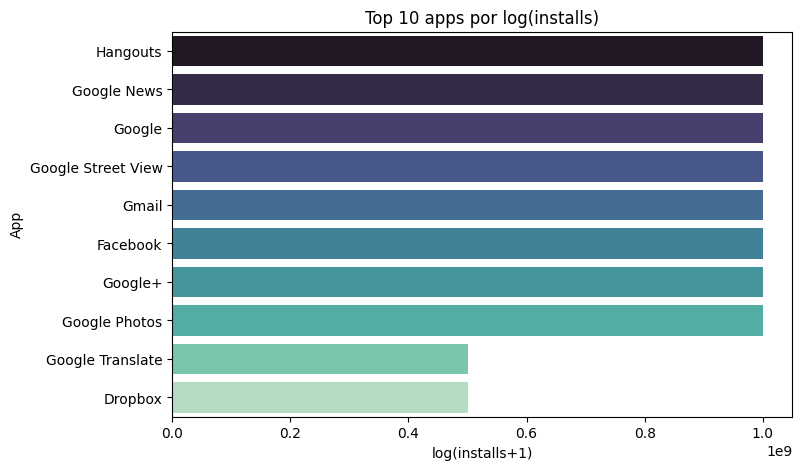

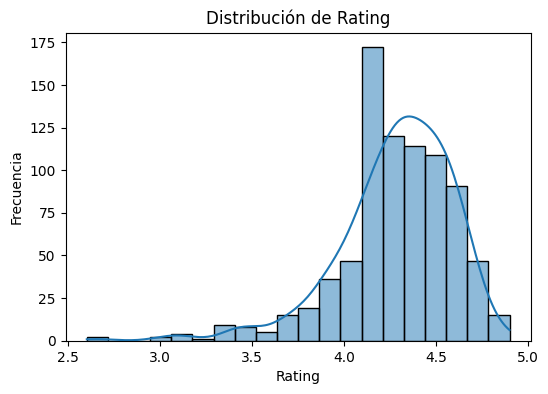

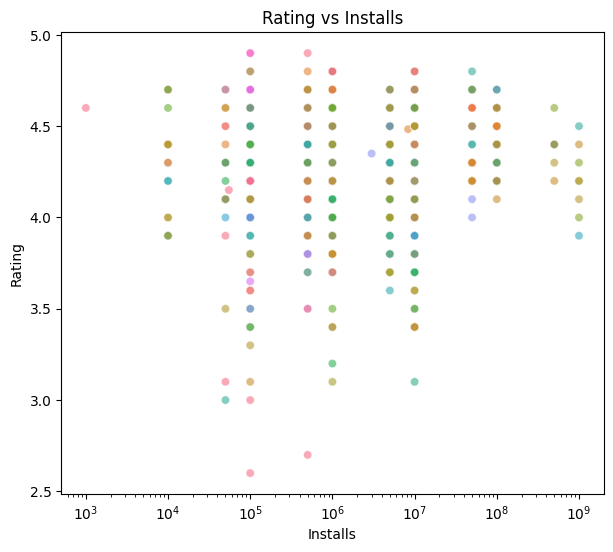

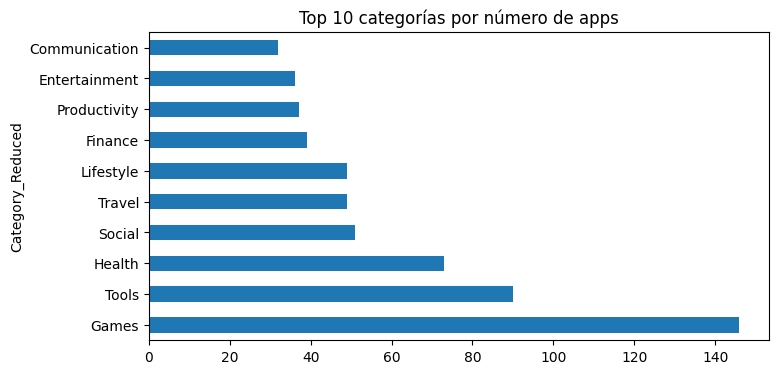

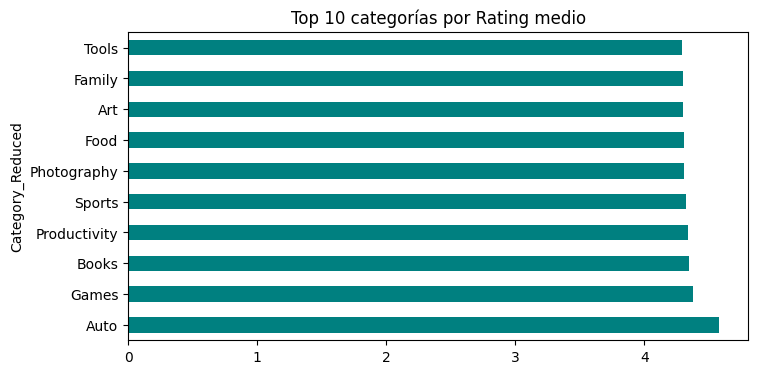

In [ ]:
# Dimensiones y tipos
print(google.shape)
print(google.dtypes)

# Estadísticos básicos
print(google[['Installs','Rating','Reviews','Price']].describe())

# Top10 apps por installs
top10 = google.sort_values('Installs',ascending=False).head(10)
print(top10[['App', 'Installs']])
plt.figure(figsize=(8,5))
sns.barplot(x='Installs',y='App',data=top10,palette='mako')
plt.title('Top 10 apps por log(installs)')
plt.xlabel('log(installs+1)')
plt.show()

# Distribución de Rating
plt.figure(figsize=(6,4))
sns.histplot(google['Rating'],bins=20,kde=True)
plt.title('Distribución de Rating')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

# Scatter Rating vs log_installs
plt.figure(figsize=(7,6))
sns.scatterplot(x='Installs', y='Rating', hue='Category_Reduced', data=google, alpha=0.6, legend=False)
plt.xscale('log')
plt.title('Rating vs Installs')
plt.show()

# Top categorías por installs y por rating
cat_stats = google.groupby('Category_Reduced').agg(
    installs_mean=('Installs','mean'),
    rating_mean=('Rating','mean'),
    count_apps=('App','size')
).sort_values('count_apps',ascending=False)

plt.figure(figsize=(8,4))
cat_stats['count_apps'].head(10).plot.barh()
plt.title('Top 10 categorías por número de apps')
plt.show()

plt.figure(figsize=(8,4))
cat_stats.sort_values('rating_mean',ascending=False)['rating_mean'].head(10).plot.barh(color='teal')
plt.title('Top 10 categorías por Rating medio')
plt.show()


#### GMM

In [80]:
google.head()

,App,Category_Reduced,Installs,Rating,Reviews,Price,Type
0,10 Best Foods for You,Health,500000.0,4.0,2490.0,0.0,0
1,11st,Shopping,10000000.0,3.8,48732.0,0.0,0
2,1800 Contacts - Lens Store,Health,1000000.0,4.7,23160.0,0.0,0
3,1LINE – One Line with One Touch,Games,10000000.0,4.6,214878.0,0.0,0
4,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,Tools,10000000.0,4.2,115773.0,0.0,0


In [ ]:
X = google[['Installs', 'Rating']].copy()
X['Installs'] = np.log1p(X['Installs'])
features = X[['Installs', 'Rating']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Probar distintos números de componentes
scores = []
models = {}
for k in range(2, 8):  
    gmm = GaussianMixture(n_components=k, random_state=0)
    labels = gmm.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    scores.append((k, sil))
    models[k] = (gmm, labels)

scores_df = pd.DataFrame(scores, columns=['n_components', 'silhouette'])
print(scores_df)

best_k, best_score = max(scores, key=lambda x: x[1])
print(f"\nMejor k: {best_k} con Silhouette = {best_score:.3f}")

   n_components  silhouette
0             2    0.347044
1             3    0.391141
2             4    0.334906
3             5    0.265782
4             6    0.207033
5             7    0.176687

Mejor k: 3 con Silhouette = 0.391


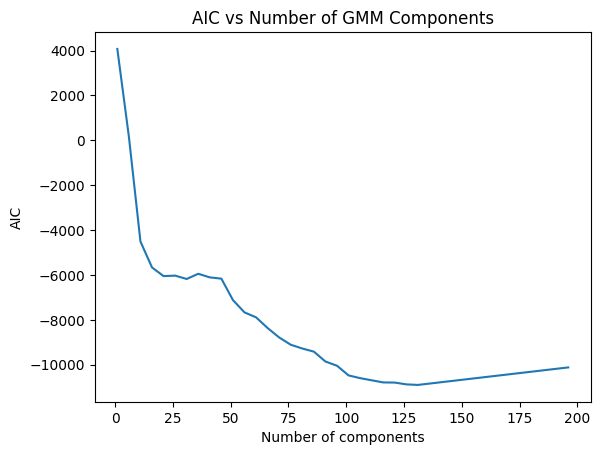

In [ ]:
from sklearn import mixture

gmm = mixture.GaussianMixture(n_components=3, covariance_type="full")
gmm.fit(X)

n_components = np.arange(1, 200, 5) 
models = [mixture.GaussianMixture(n, covariance_type='full') for n in n_components]
aics = [model.fit(X).aic(X) for model in models]
plt.plot(n_components, aics)
plt.xlabel('Number of components')
plt.ylabel('AIC')
plt.title('AIC vs Number of GMM Components')
plt.show()

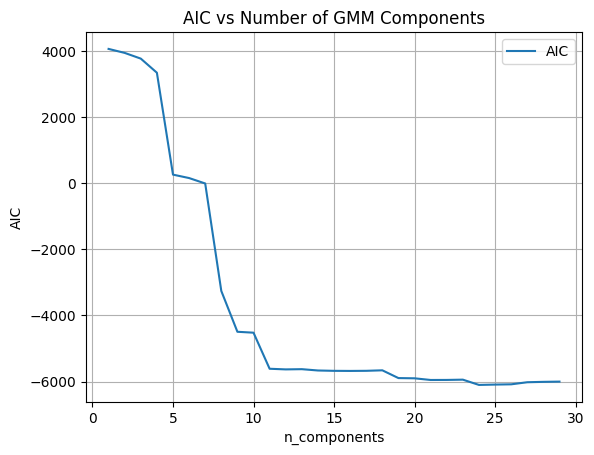

In [83]:
n_components = np.arange(1, 30)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in n_components]

plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.xlabel('n_components');
plt.ylabel('AIC')
plt.title('AIC vs Number of GMM Components')
plt.legend()
plt.grid()
plt.show()


In [84]:
aics = np.asarray([m.aic(X) for m in models])
np.where(aics == np.amin(aics))[0][0]

np.int64(23)

   n_components  silhouette
0             3    0.346619
1            23    0.088520

Mejor k: 3 con Silhouette = 0.347


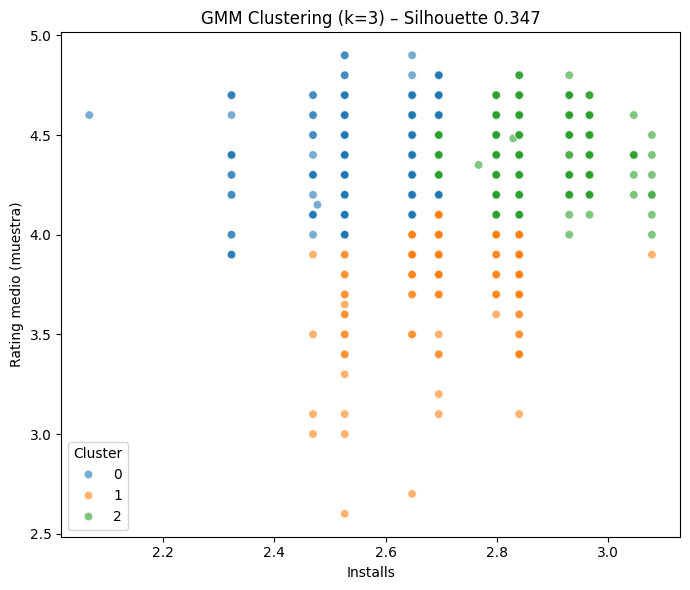

In [95]:

X = google[['Installs', 'Rating']].copy()
X['Installs'] = np.log1p(X['Installs'])
features = X[['Installs', 'Rating']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Probar distintos números de componentes
scores = []
models = {}
for k in [3, 23]: 
    gmm = GaussianMixture(n_components=k, random_state=0)
    labels = gmm.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    scores.append((k, sil))
    models[k] = (gmm, labels)

scores_df = pd.DataFrame(scores, columns=['n_components', 'silhouette'])
print(scores_df)

best_k, best_score = max(scores, key=lambda x: x[1])
print(f"\nMejor k: {best_k} con Silhouette = {best_score:.3f}")

best_gmm, best_labels = models[best_k]
google['gmm_cluster'] = best_labels
google['Installs'] = X['Installs']

plt.figure(figsize=(7,6))
palette = sns.color_palette('tab10', best_k)
sns.scatterplot(
    x='Installs',
    y='Rating',
    hue='gmm_cluster',
    data=google,
    palette=palette,
    alpha=0.6,
    legend='full'
)
plt.title(f'GMM Clustering (k={best_k}) – Silhouette {best_score:.3f}')
plt.xlabel('Installs')
plt.ylabel('Rating medio (muestra)')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


¿Influye el rating en las descargas?
Sí, pero solo hasta establecer un umbral de aceptabilidad (~★3,5-3,8).
Superado ese corte, el número de descargas depende más de factores exógenos (marca, red de distribución, utilidad percibida, gratuidad, categoría) que de incrementar unas décimas el rating.
Implicación para la confianza digital: los usuarios usan el rating para filtrar riesgos (evitar malas experiencias), pero su decisión final se guía por conveniencia y reputación; por tanto, mejorar de ★4,2 a ★4,6 eleva la imagen de calidad, pero no garantiza un crecimiento proporcional en descargas.

#### HDBSCAN

In [88]:
google.head()

,App,Category_Reduced,Installs,Rating,Reviews,Price,Type,gmm_cluster
0,10 Best Foods for You,Health,13.122365,4.0,2490.0,0.0,0,0
1,11st,Shopping,16.118096,3.8,48732.0,0.0,0,1
2,1800 Contacts - Lens Store,Health,13.815512,4.7,23160.0,0.0,0,0
3,1LINE – One Line with One Touch,Games,16.118096,4.6,214878.0,0.0,0,2
4,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,Tools,16.118096,4.2,115773.0,0.0,0,2


In [ ]:

df = google.copy()

df['log_installs'] = np.log1p(df['Installs'])

X = df[['log_installs','Rating']].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [103]:
param_grid = [
    {'min_cluster_size': 20, 'min_samples': 5},
    {'min_cluster_size': 20, 'min_samples': 10},
    {'min_cluster_size': 20, 'min_samples': 20},
    {'min_cluster_size': 50, 'min_samples': 5},
    {'min_cluster_size': 50, 'min_samples': 10},
    {'min_cluster_size': 50, 'min_samples': 20},
]

results = []
for params in param_grid:
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=params['min_cluster_size'],
        min_samples=params['min_samples'],
        cluster_selection_method='eom'
    )
    labels = clusterer.fit_predict(X_scaled)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    noise_pct = np.mean(labels == -1)
    results.append({
        'params': params,
        'n_clusters': n_clusters,
        'noise_pct': noise_pct,
        'labels': labels
    })

results_df = pd.DataFrame([
    {'params': r['params'], 'n_clusters': r['n_clusters'], 'noise_pct': r['noise_pct']}
    for r in results
])
print(results_df)

best_idx = results_df.sort_values(['n_clusters', 'noise_pct'], ascending=[False, True]).index[0]
labels = results[best_idx]['labels']
df['hdbscan_cluster'] = labels
print(f"Mejor parámetro: {results[best_idx]['params']}")


                                        params  n_clusters  noise_pct
0   {'min_cluster_size': 20, 'min_samples': 5}          17   0.099265
1  {'min_cluster_size': 20, 'min_samples': 10}          17   0.136029
2  {'min_cluster_size': 20, 'min_samples': 20}          15   0.202206
3   {'min_cluster_size': 50, 'min_samples': 5}           4   0.044118
4  {'min_cluster_size': 50, 'min_samples': 10}           4   0.064951
5  {'min_cluster_size': 50, 'min_samples': 20}           4   0.109069
Mejor parámetro: {'min_cluster_size': 20, 'min_samples': 5}


In [104]:
summary = df.groupby('hdbscan_cluster').agg(
    n_apps=('App', 'count'),
    avg_installs=('Installs', 'mean'),
    avg_rating=('Rating', 'mean')
).sort_values('n_apps', ascending=False)
print(summary)


                 n_apps  avg_installs  avg_rating
hdbscan_cluster                                  
 0                  108      2.516284    4.239815
 1                  107      2.963536    4.415888
-1                   81      2.658356    4.165432
 2                   59      2.647760    4.300000
 5                   53      2.695675    3.979245
 13                  47      2.825185    3.891489
 6                   41      2.829793    4.499593
 3                   39      2.826358    4.600000
 11                  37      2.797948    4.347297
 4                   37      2.826730    4.200000
 9                   36      2.695675    4.300000
 16                  29      2.695675    4.400000
 8                   28      2.695675    4.200000
 15                  26      2.695675    4.500000
 12                  24      2.821191    4.100000
 7                   23      2.840136    4.400000
 10                  21      2.840136    4.300000
 14                  20      2.695675    4.600000


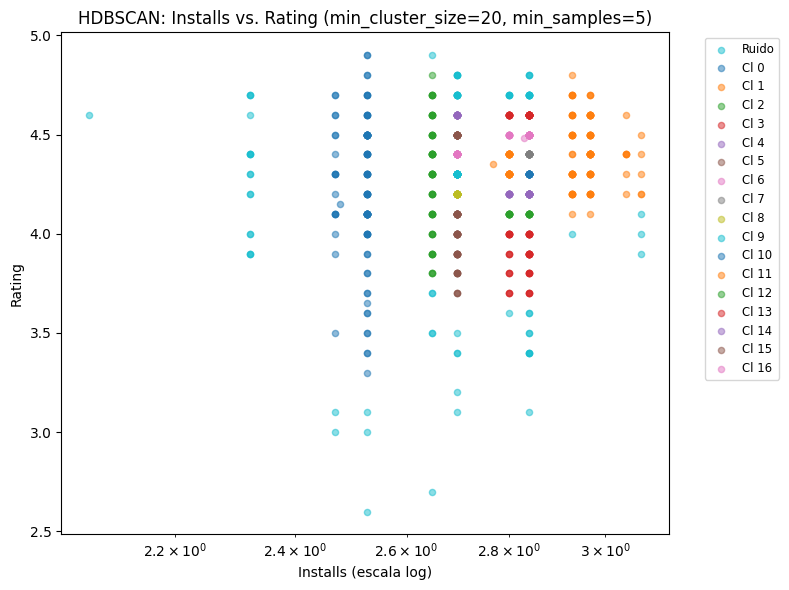

In [ ]:

best_idx_20_5 = [i for i, r in enumerate(results) if r['params'] == {'min_cluster_size': 20, 'min_samples': 5}][0]
labels_20_5 = results[best_idx_20_5]['labels']

plt.figure(figsize=(8,6))
palette = plt.get_cmap('tab10')

for c in np.unique(labels_20_5):
    mask = labels_20_5 == c
    color = palette(c % 10)
    label = 'Ruido' if c == -1 else f'Cl {c}'
    plt.scatter(
        df.loc[mask, 'Installs'],
        df.loc[mask, 'Rating'],
        s=20, alpha=0.5,
        color=color,
        label=label
    )

plt.xscale('log')
plt.xlabel('Installs (escala log)')
plt.ylabel('Rating')
plt.title('HDBSCAN: Installs vs. Rating (min_cluster_size=20, min_samples=5)')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()
